Importing and deviding the MNIST Dataset

In [3]:
# importer tensorflow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Importer la base de donnee MNIST
from tensorflow.keras.datasets import mnist

In [4]:
# division des donnees
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Exploring the data

In [41]:
X_train.shape

(54210, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Data Balancing and Shuffling

In [9]:
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

In [10]:
def Counter(X_train,y_train):
  return {i : len(X_train[y_train == i]) for i in range(0,10)}
Counter(X_train,y_train)

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [11]:
# Random under-sampling with imblearn
from imblearn.under_sampling import RandomUnderSampler
X = X_train.reshape(X_train.shape[0], 1*28*28)

rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y_train)

print('original dataset shape:', Counter(X_train,y_train))
print('Resample dataset shape', Counter(x_rus,y_rus))

original dataset shape: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Resample dataset shape {0: 5421, 1: 5421, 2: 5421, 3: 5421, 4: 5421, 5: 5421, 6: 5421, 7: 5421, 8: 5421, 9: 5421}


In [12]:
x_rus.shape

(54210, 784)

In [47]:
X_train, y_train = x_rus.reshape(x_rus.shape[0], 28,28), y_rus

In [46]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=25)

Data Preprocessing

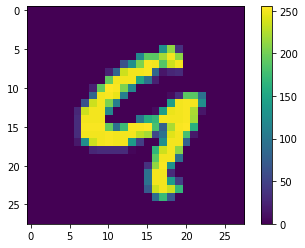

In [15]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

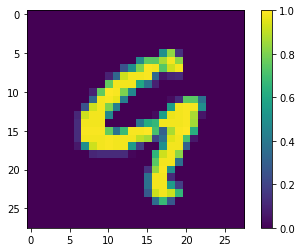

In [17]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

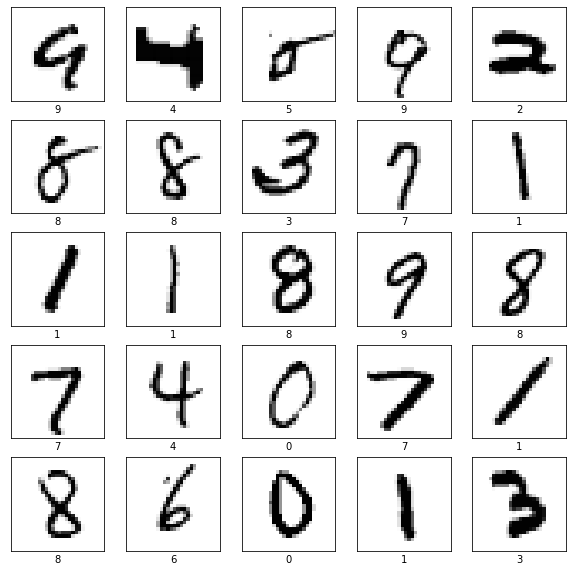

In [18]:
#verifying data format
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="Greys")
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [44]:
print(y_train.shape)
print(y_test.shape)

(54210,)
(10000, 10)


In [19]:
y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)
print(y_train.shape)
print(y_test.shape)

(54210, 10)
(10000, 10)


Building the Model

In [34]:
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model, Input
from tensorflow.keras.optimizers import Adam

In [35]:
model_input = tf.keras.Input(shape=(28,28,1))
x = Conv2D(10, (3,3), activation='relu')(model_input)
x = MaxPool2D(pool_size=(2,2), strides=2)(x)
x = Conv2D(100, (4,4), activation='relu')(x)
x = MaxPool2D(pool_size= (2,2), strides=2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [36]:
model=Model(model_input,output)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 100)       16100     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 100)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0   

In [38]:
cost= tf.reduce_mean

Training the Model

In [25]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
5421/5421 [==============================] - 68s 12ms/step - loss: 0.1157 - accuracy: 0.9647
Epoch 2/5
5421/5421 [==============================] - 67s 12ms/step - loss: 0.0470 - accuracy: 0.9875
Epoch 3/5
5421/5421 [==============================] - 72s 13ms/step - loss: 0.0373 - accuracy: 0.9912
Epoch 4/5
5421/5421 [==============================] - 70s 13ms/step - loss: 0.0322 - accuracy: 0.9924
Epoch 5/5
5421/5421 [==============================] - 74s 14ms/step - loss: 0.0315 - accuracy: 0.9926


In [26]:
loss_and_metrics = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0584 - accuracy: 0.9875


Making Predictions

In [27]:
import matplotlib.pyplot as plt

In [28]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
      dtype=float32)

In [29]:
np.argmax(predictions[0])

7

In [30]:
np.argmax(y_test[0])

7

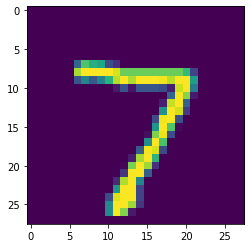

(28, 28)


In [31]:
img=X_test[0]
plt.imshow(img)
plt.show()
print(img.shape)

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap="Greys")

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

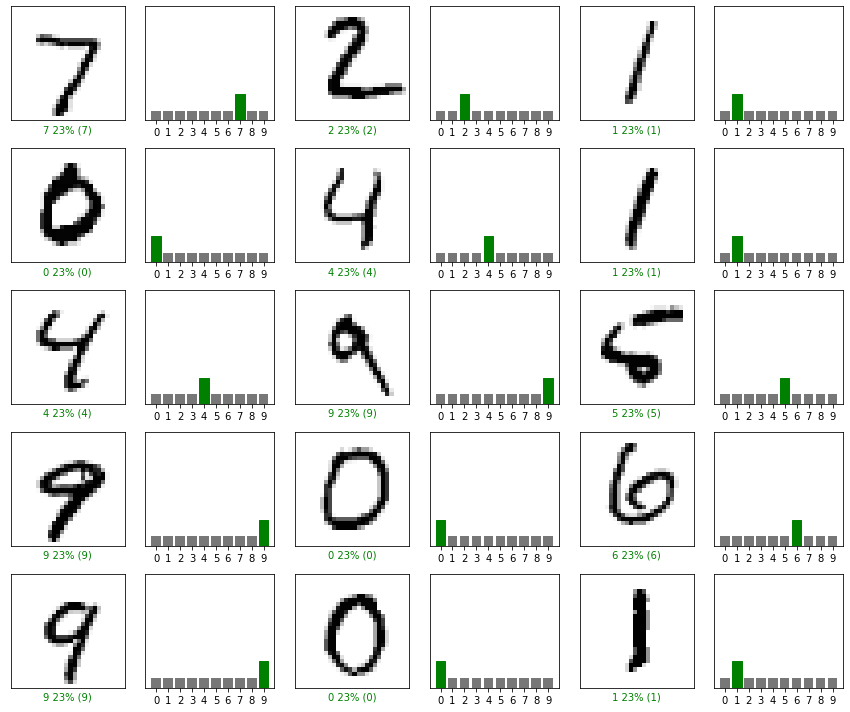

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()